In [2]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.figure import Figure
from scipy.signal import argrelextrema
import scipy

In [3]:
d=np.fromfile('28 (1).dat', dtype=int, count=- 1, sep='', offset=0)
data = pd.DataFrame(d[7:]/1000)
data.reset_index(drop = True)

,0
0,0.070
1,0.052
2,0.050
3,0.058
4,0.050
...,...
936,0.043
937,0.028
938,0.022
939,0.022


In [4]:
data_val = data.values
data_val=list(data_val)
data_val

[array([0.07]),
 array([0.052]),
 array([0.05]),
 array([0.058]),
 array([0.05]),
 array([0.051]),
 array([0.059]),
 array([0.052]),
 array([0.054]),
 array([0.056]),
 array([0.052]),
 array([0.057]),
 array([0.057]),
 array([0.054]),
 array([0.048]),
 array([0.038]),
 array([0.036]),
 array([0.044]),
 array([0.042]),
 array([0.034]),
 array([0.038]),
 array([0.036]),
 array([0.04]),
 array([0.05]),
 array([0.049]),
 array([0.046]),
 array([0.045]),
 array([0.048]),
 array([0.048]),
 array([0.043]),
 array([0.036]),
 array([0.032]),
 array([0.035]),
 array([0.036]),
 array([0.034]),
 array([0.03]),
 array([0.035]),
 array([0.037]),
 array([0.037]),
 array([0.042]),
 array([0.038]),
 array([0.032]),
 array([0.032]),
 array([0.037]),
 array([0.042]),
 array([0.045]),
 array([0.038]),
 array([0.034]),
 array([0.033]),
 array([0.03]),
 array([0.031]),
 array([0.03]),
 array([0.032]),
 array([0.032]),
 array([0.026]),
 array([0.039]),
 array([0.039]),
 array([0.026]),
 array([0.031]),
 arra

In [5]:
from itertools import chain
data_val_ = list(chain.from_iterable(data_val))
data_val_

[0.07,
 0.052,
 0.05,
 0.058,
 0.05,
 0.051,
 0.059,
 0.052,
 0.054,
 0.056,
 0.052,
 0.057,
 0.057,
 0.054,
 0.048,
 0.038,
 0.036,
 0.044,
 0.042,
 0.034,
 0.038,
 0.036,
 0.04,
 0.05,
 0.049,
 0.046,
 0.045,
 0.048,
 0.048,
 0.043,
 0.036,
 0.032,
 0.035,
 0.036,
 0.034,
 0.03,
 0.035,
 0.037,
 0.037,
 0.042,
 0.038,
 0.032,
 0.032,
 0.037,
 0.042,
 0.045,
 0.038,
 0.034,
 0.033,
 0.03,
 0.031,
 0.03,
 0.032,
 0.032,
 0.026,
 0.039,
 0.039,
 0.026,
 0.031,
 0.038,
 0.034,
 0.032,
 0.03,
 0.025,
 0.026,
 0.028,
 0.036,
 0.034,
 0.025,
 0.028,
 0.031,
 0.028,
 0.025,
 0.026,
 0.026,
 0.028,
 0.026,
 0.025,
 0.028,
 0.032,
 0.032,
 0.034,
 0.034,
 0.03,
 0.03,
 0.029,
 0.028,
 0.028,
 0.026,
 0.026,
 0.024,
 0.028,
 0.035,
 0.029,
 0.026,
 0.027,
 0.031,
 0.036,
 0.033,
 0.024,
 0.022,
 0.02,
 0.023,
 0.027,
 0.024,
 0.024,
 0.026,
 0.026,
 0.022,
 0.018,
 0.022,
 0.024,
 0.023,
 0.027,
 0.027,
 0.022,
 0.024,
 0.028,
 0.026,
 0.022,
 0.024,
 0.022,
 0.023,
 0.031,
 0.029,
 0.023,
 0.0

# Эталонный максимум

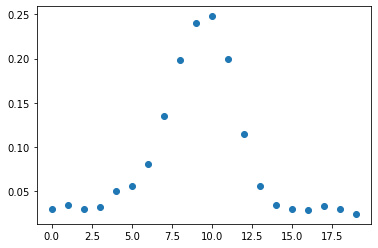

In [6]:
plt.plot(data_val_[415:435],'o')

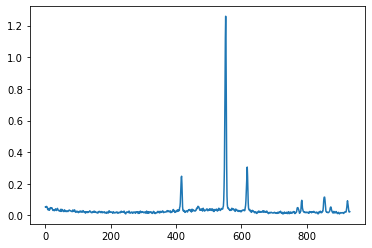

In [7]:
plt.plot(data_val[8:])

# Нахождение максимума простым способом

In [10]:
coord, heights= scipy.signal.find_peaks(data_val_,prominence = 0.035,height = 0)
peak_coord = coord
peak_heights = heights['peak_heights']
peak_width = scipy.signal.peak_widths(data_val_, peak_coord)
for i in peak_coord:
    i = int(i)
print(f" Координаты всех пиков: {peak_coord}")
print(f" Высоты всех пиков: {peak_heights}")
print(f" Ширины всех пиков: {list(peak_width[0])}")
print(f" Средняя ширина пика: {np.mean(list(peak_width[0]))}")
print(f" Средняя высота пика: {np.mean(peak_heights)}")

 Координаты всех пиков: [425 560 626 781 793 862 882 933]
 Высоты всех пиков: [0.248 1.259 0.306 0.05  0.096 0.116 0.054 0.093]
 Ширины всех пиков: [4.7828877005347294, 4.698950269763145, 4.69890393294645, 6.467532467532465, 3.966666666666697, 6.114604462474631, 4.857142857142776, 4.129166666666606]
 Средняя ширина пика: 4.964481877965937
 Средняя высота пика: 0.27775


In [11]:
coord

array([425, 560, 626, 781, 793, 862, 882, 933], dtype=int64)

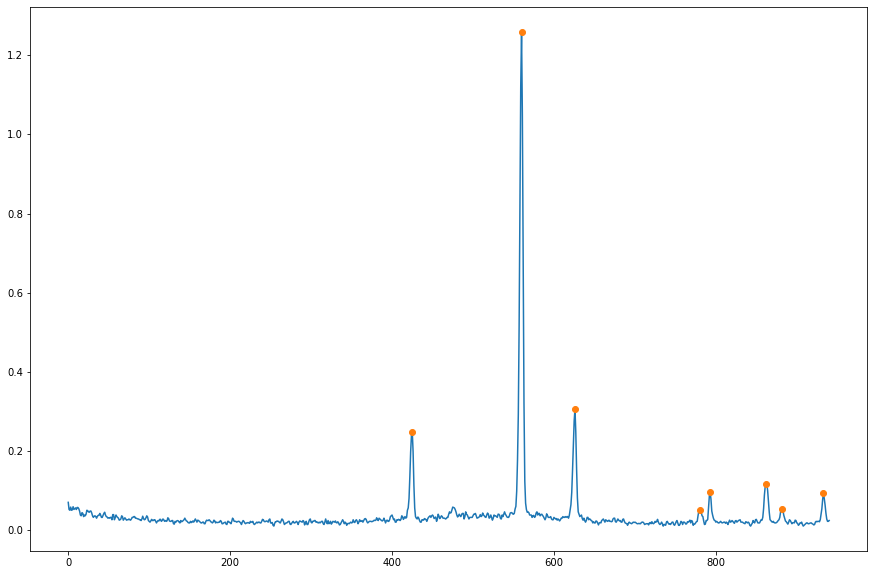

In [13]:
plt.figure(figsize = (15,10))
plt.plot(data_val_)
plt.plot(peak_coord, peak_heights,'o')

# Нахождение максимума методом ковариации

Берем "идеальный" пик и итерируем. Моделью идеального пика проходимся по массиву, смещаясь на единицу

In [14]:
cov = np.cov(data_val_[550:570],data_val_[5:25])

In [15]:
covar = pd.DataFrame(cov)

In [16]:
covar

,0,1
0,0.169020,-0.000726
1,-0.000726,0.000066


In [17]:
covariance = []
x,y = 0,20
while y <= len(data_val_):
    pop = np.cov(data_val_[x:y], data_val_[415:435])
    covariance.append(pop[0][1])
    x+=1
    y+=1

In [18]:
covariance

[0.00022601578947368416,
 0.00032525789473684204,
 0.00033987894736842107,
 0.00025737894736842107,
 0.00010840000000000002,
 -7.033421052631582e-05,
 -0.0002035315789473685,
 -0.0002672315789473684,
 -0.0003389578947368421,
 -0.00038015263157894743,
 -0.000368171052631579,
 -0.00029633947368421046,
 -0.00012769473684210524,
 5.699473684210529e-05,
 0.00020056842105263163,
 0.00030144736842105266,
 0.0003583105263157895,
 0.00034762894736842096,
 0.0003073315789473683,
 0.00021329210526315785,
 4.121842105263154e-05,
 -9.357105263157895e-05,
 -0.00017835,
 -0.00022469736842105256,
 -0.00023361052631578938,
 -0.0002284342105263158,
 -0.00020579999999999993,
 -0.0001344657894736842,
 -3.285e-05,
 3.697894736842106e-05,
 5.4802631578947346e-05,
 3.802631578947368e-05,
 4.6610526315789476e-05,
 9.988157894736843e-05,
 0.00017620789473684207,
 0.00023828157894736842,
 0.00017767894736842106,
 8.16684210526316e-05,
 1.5960526315789504e-05,
 -6.307631578947365e-05,
 -0.00011969736842105262,
 

# Найдём 8 пиков

In [19]:
covar_copy = covariance.copy()
biggest_values = []
for i in range(1,9):
    value_n_index = []
    biggest_value = max(covar_copy)
    value_index = covariance.index(biggest_value)
    value_n_index.append(biggest_value)
    nearby_big_values = list(range(value_index-5, value_index+5))
    print(nearby_big_values)
    value_n_index.append(value_index)
    biggest_values.append(value_n_index)
    for k in nearby_big_values:
        if covariance[k] in covar_copy:
            covar_copy.remove(covariance[k])

[545, 546, 547, 548, 549, 550, 551, 552, 553, 554]
[611, 612, 613, 614, 615, 616, 617, 618, 619, 620]
[410, 411, 412, 413, 414, 415, 416, 417, 418, 419]
[848, 849, 850, 851, 852, 853, 854, 855, 856, 857]
[779, 780, 781, 782, 783, 784, 785, 786, 787, 788]
[867, 868, 869, 870, 871, 872, 873, 874, 875, 876]
[766, 767, 768, 769, 770, 771, 772, 773, 774, 775]
[916, 917, 918, 919, 920, 921, 922, 923, 924, 925]


IndexError: list index out of range

In [20]:
biggest_values


[[0.031140081578947366, 550],
 [0.0070353631578947366, 616],
 [0.005915734210526316, 415],
 [0.0027929052631578944, 853],
 [0.0017472026315789473, 784],
 [0.0009227710526315787, 872],
 [0.0008821342105263157, 771],
 [0.0006823473684210527, 921]]

In [21]:
biggest_values_coord = sorted([i[1] for i in biggest_values])
biggest_values_coord = [i+10 for i in biggest_values_coord]
biggest_values_coord

[425, 560, 626, 781, 794, 863, 882, 931]

In [22]:
peak_coord

array([425, 560, 626, 781, 793, 862, 882, 933], dtype=int64)

In [23]:
peak_heights_gauss = [data_val_[i] for i in biggest_values_coord]
peak_heights_gauss

[0.248, 1.259, 0.306, 0.05, 0.078, 0.116, 0.054, 0.054]

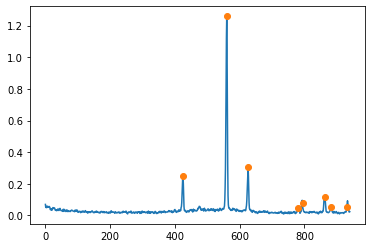

In [24]:

plt.plot(data_val_)
plt.plot(biggest_values_coord, peak_heights_gauss, "o")

In [38]:
numbers = data_val

In [39]:
def method(L):     
    Numbers=[i[0] for i in numbers] 
    for i in range(0,(len(Numbers)-L)): 
        a=Numbers[i] 
        b=Numbers[i+L-1] 
        for j in range(1,L): 
            line=np.linspace(a,b,L) 
            if line[j]<Numbers[i+j]: 
                Numbers[i+j]=line[j] 
    return Numbers

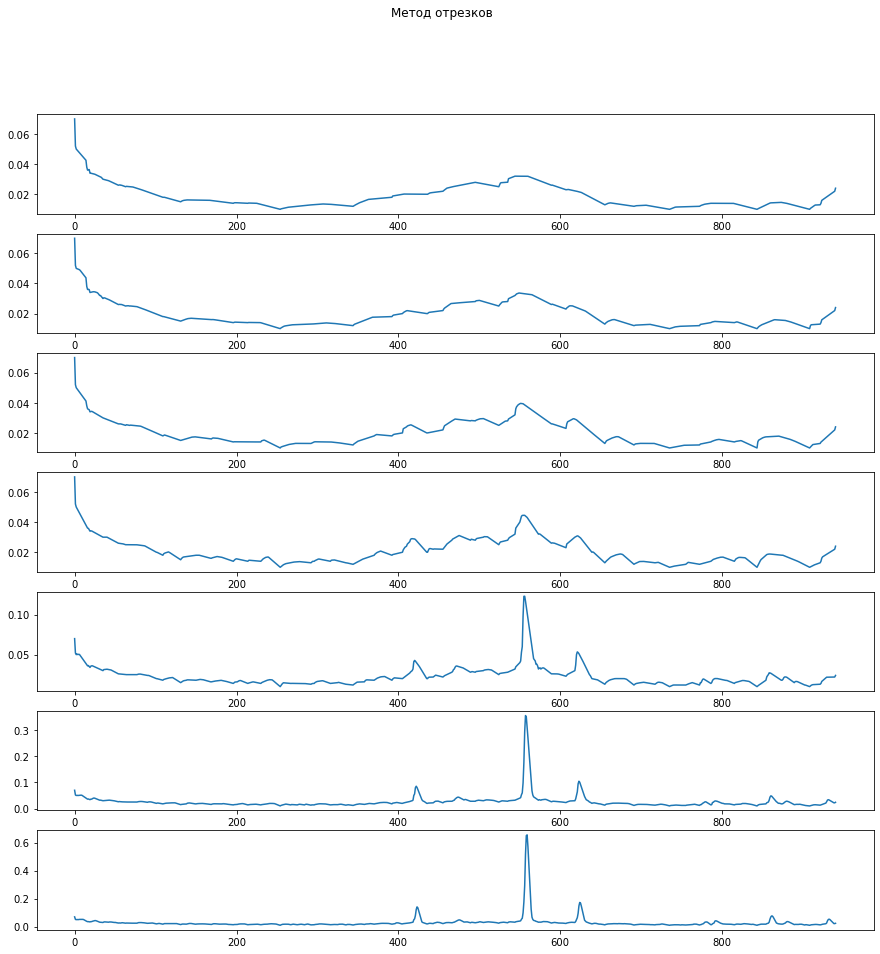

In [42]:
L_nums=[30,25,20,15,10,7,5] 
fig, ax = plt.subplots(7,figsize=(15,15)) 
fig.suptitle('Метод отрезков') 
for i in range(len(L_nums)): 
    ax[i].plot(method(L_nums[i]))

Отрезок L=5 дал лучший результат